In [55]:
from fipy import CellVariable, Grid1D, DiffusionTerm, PowerLawConvectionTerm, Viewer
from fipy.tools import numerix

In [56]:
diffCoeff = 1.  # diffúziós és konvekciós együtthatók
convCoeff = (10.,)  # a vessző miatt ez egy vektor

L = 10.  # teljes hossz, amire lefut a program
nx = 100  # ennyi részre lesz felosztva
mesh = Grid1D(dx=L / nx, nx=nx)  # új mesh nx számú dx széles lépésközzel

In [57]:
valueLeft = (0.,)  # határfeltételekhez adatok
valueRight = 0.

var = CellVariable(mesh=mesh, name="variable")  # "megoldási változó" - ez lesz a sűrűségfv

var.faceGrad.constrain(valueLeft, where=mesh.facesLeft)  # határfeltételek érvényesítése
var.constrain(valueRight, mesh.facesRight)

In [58]:
eq = (DiffusionTerm(coeff=diffCoeff)  # az egyenlet alakja FiPy-ban az együtthatókkal
      + PowerLawConvectionTerm(coeff=convCoeff))

eq.solve(var=var)  # az egyenlet megoldása "var"-ra a megadott együtthatókkal

C:\ProgramData\Anaconda3\lib\site-packages\fipy\solvers\scipy\linearLUSolver.py:41: RuntimeWarning: invalid value encountered in double_scalars
  if (numerix.sqrt(numerix.sum(errorVector**2)) / error0)  <= self.tolerance:


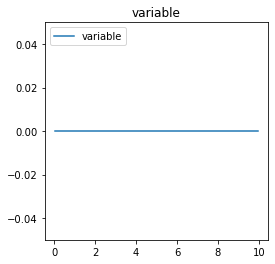

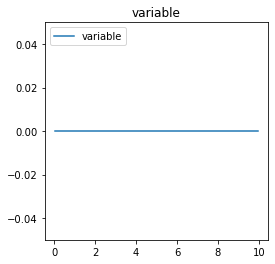

In [54]:
viewer = Viewer(vars=var)
viewer.plot()